# THE SPARKS FOUNDATION
## AUTHOR - MOHNISH PAMNANI 
## Task 5 - Exploratory Data Analysis on 'INDIAN PREMIER LEAGUE'

In [140]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries Imported!")

Libraries Imported!


In [141]:
#Importing .csv files
matches_df = pd.read_csv('matches.csv')

In [142]:
#Printing first 5 rows from Matches dataset
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [143]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [144]:
matches_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

### Number of matches played so far

In [145]:
print("Number of matches played so far : ",matches_df.shape[0])

Number of matches played so far :  756


### Number of seasons played 

In [21]:
print("Number of seasons played : ",len(matches_df.season.unique()))

Number of seasons played :  12


In [22]:
matches_df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

#### Team won by maximum runs! 

In [25]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

#### Team won by maximum wickets! 

In [26]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

#### Team won by minimum runs! 

In [27]:
matches_df.iloc[matches_df[matches_df['win_by_runs'].ge(1)].win_by_runs.idxmax()]['winner']

'Mumbai Indians'

#### Team won by minimum wickets! 

In [28]:
matches_df.iloc[matches_df[matches_df['win_by_wickets'].ge(1)].win_by_wickets.idxmax()]['winner']

'Kolkata Knight Riders'

### Number of Matches Played each Season 

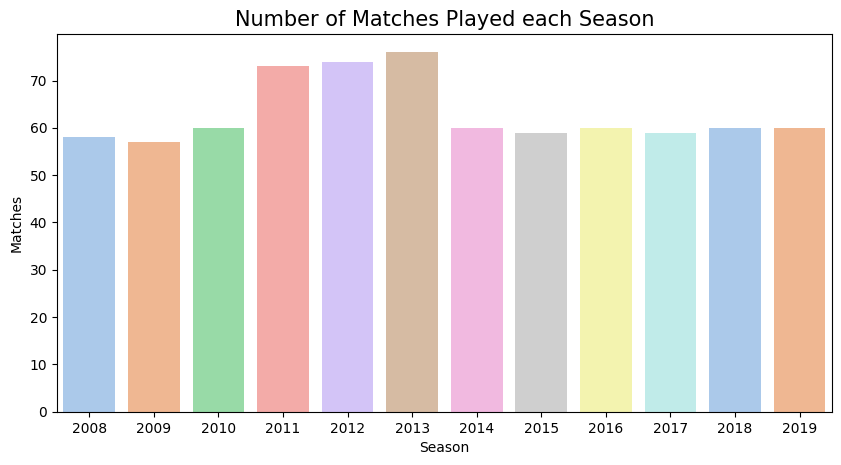

In [49]:
plt.figure(figsize = (10,5),dpi=100)
sns.countplot(x = 'season' , data = matches_df , palette = 'pastel')
plt.title('Number of Matches Played each Season',fontsize = 15)
plt.xlabel('Season',fontsize = 10)
plt.ylabel('Matches',fontsize = 10)
plt.show()

#### In the year, 2013 most number of IPL matches have been played.

### Number of Matches Won by Teams! 

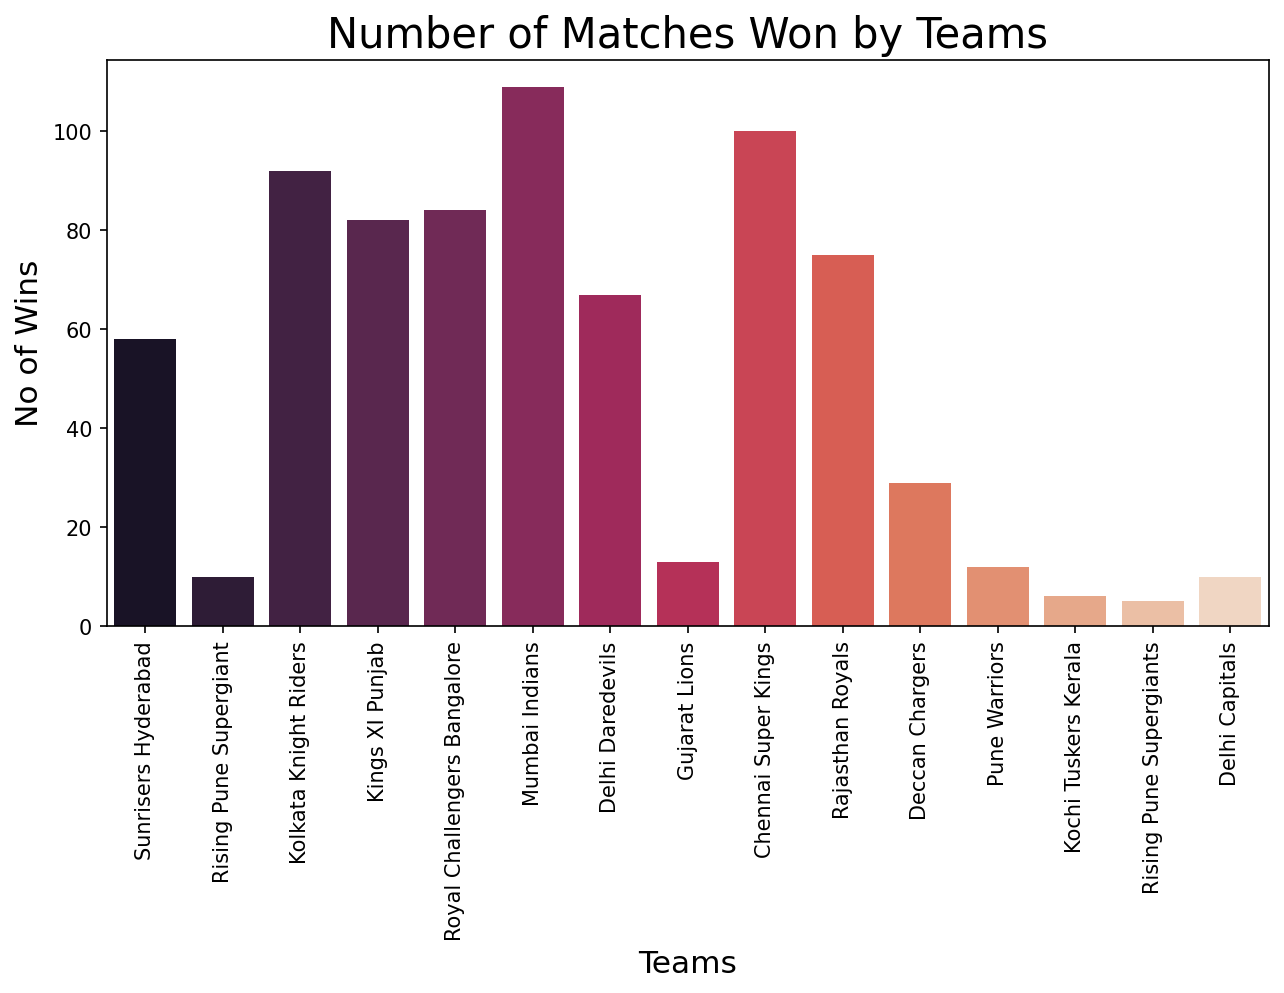

In [137]:
plt.figure(figsize = (10,5),dpi=150)
sns.countplot(x = 'winner' , data = matches_df , palette = 'rocket')
plt.title("Number of Matches Won by Teams",fontsize = 20)
plt.xlabel('Teams',fontsize = 15)
plt.ylabel('No of Wins',fontsize = 15)
plt.xticks(rotation=90)
plt.show()

#### Mumbai Indians have won the most number of matches. 

## Number of the Matches Played in Stadiums

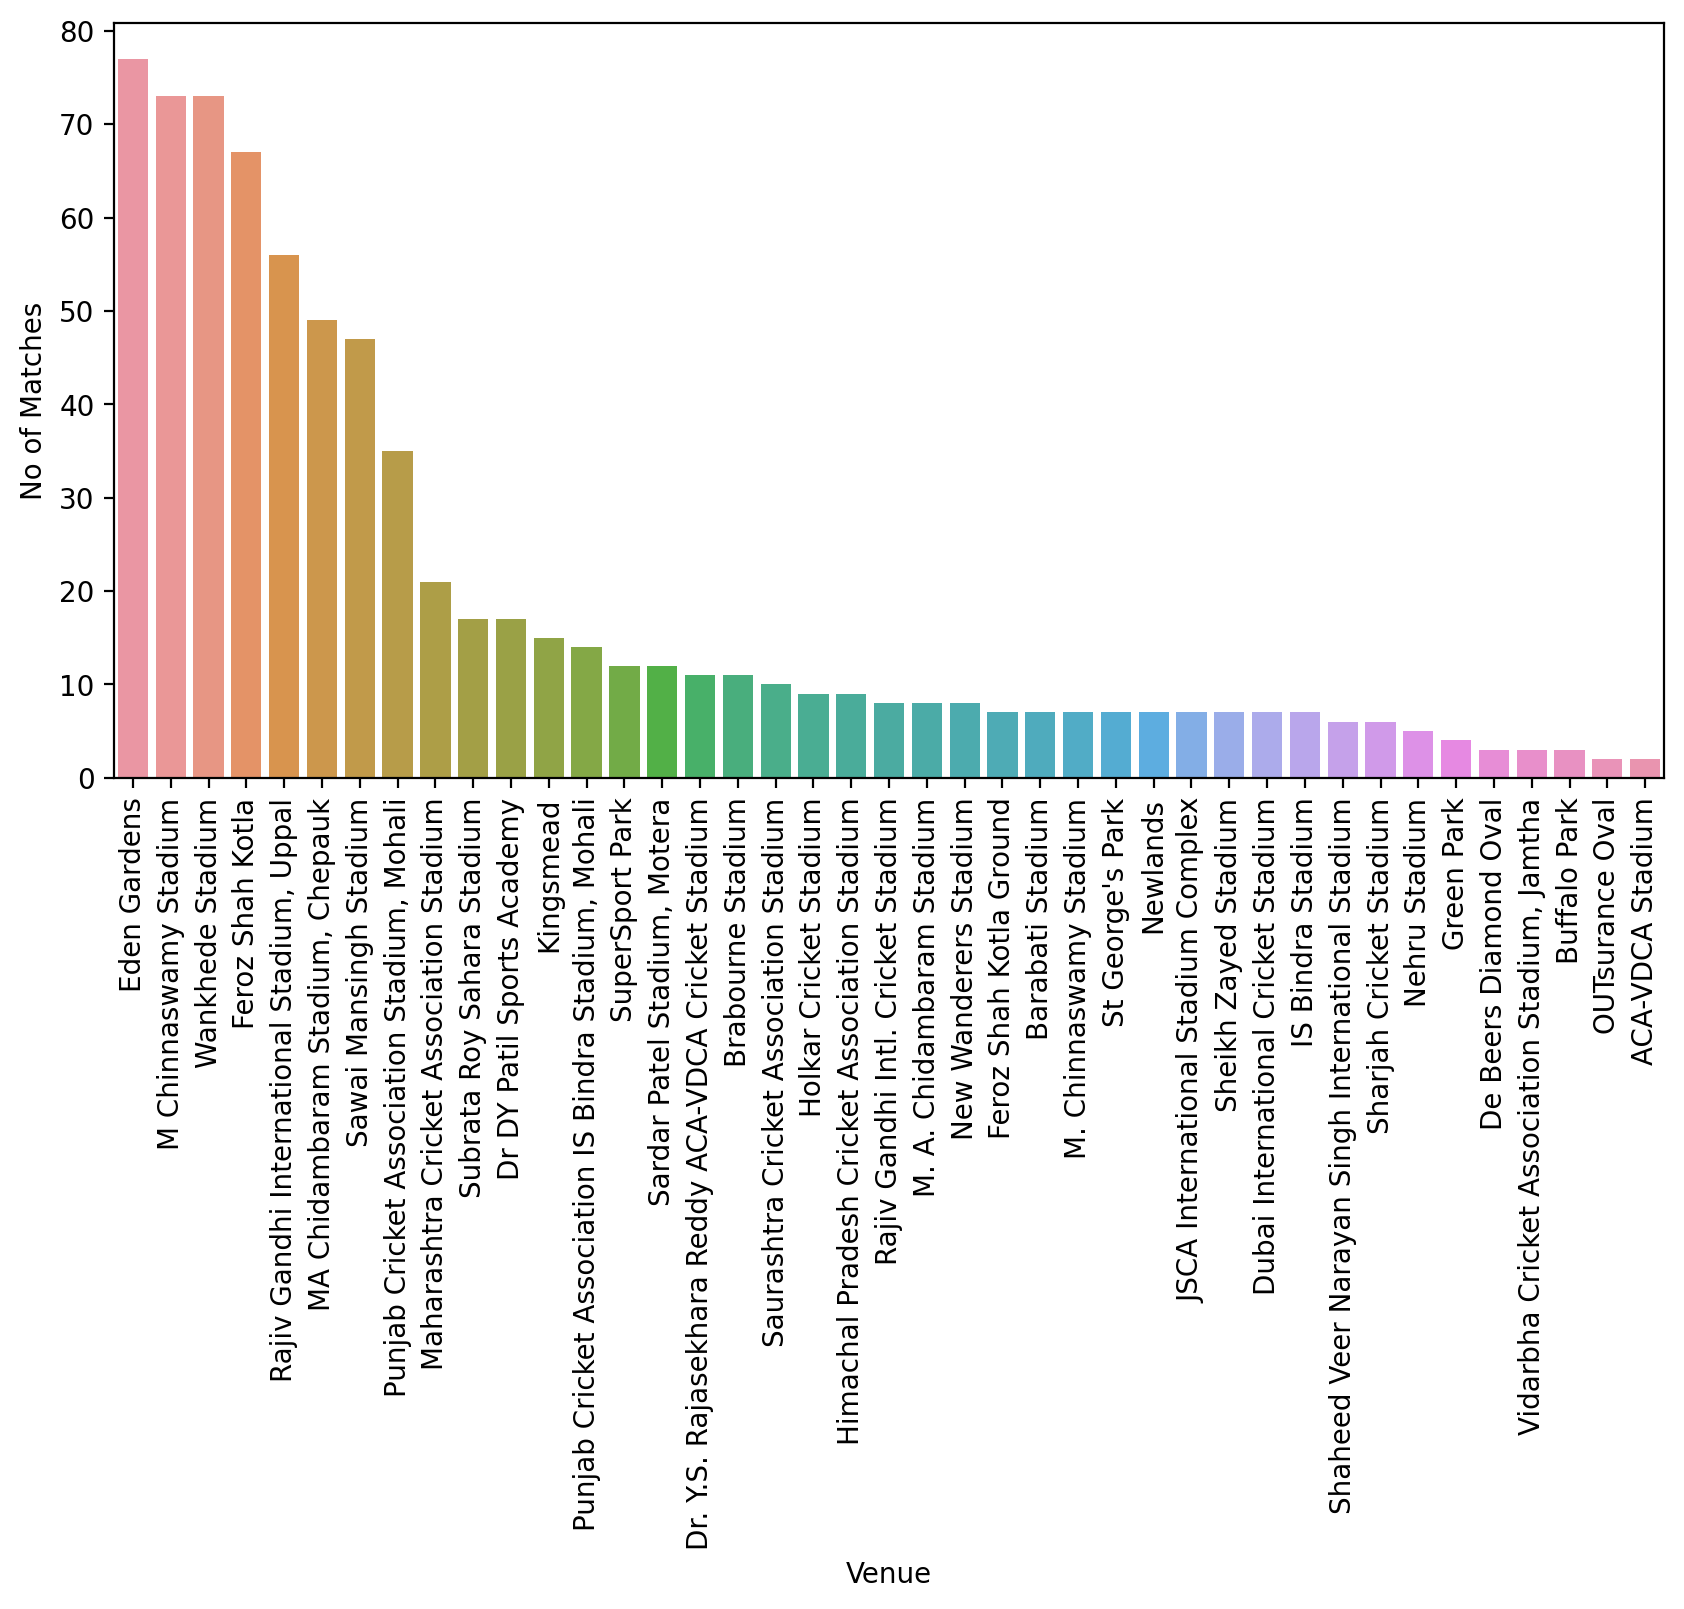

In [89]:
plt.figure(figsize = (10,5),dpi=200)
sns.countplot(x = 'venue' , data = matches_df, order = matches_df['venue'].value_counts().index)
plt.xticks(rotation = 'vertical')
plt.xlabel('Venue')
plt.ylabel('No of Matches')
plt.show()

### Most of number of matches have been played in the Eden Gardens, Kolkata.

In [51]:
matches_df['win_by']=np.where(matches_df['win_by_runs']>0,'Bat first','Bowl first')

## Number of Matches Won by Batting or Bowling First 

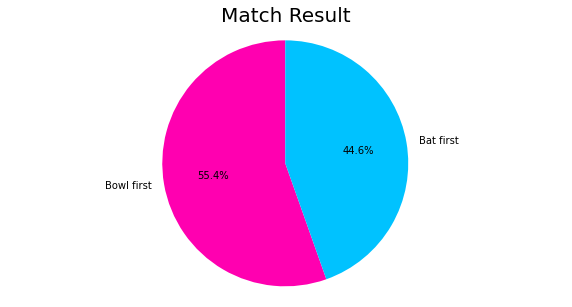

In [65]:
Win = matches_df.win_by.value_counts()
labels = np.array(Win.index)
sizes = Win.values
colors = ['#ff00b0', '#00c2ff']
plt.figure(figsize = (10,5))
plt.pie(sizes, labels = labels, colors = colors, autopct='%1.1f%%' ,startangle=90)
plt.title('Match Result',fontsize = 20)
plt.axis('equal')
plt.show()

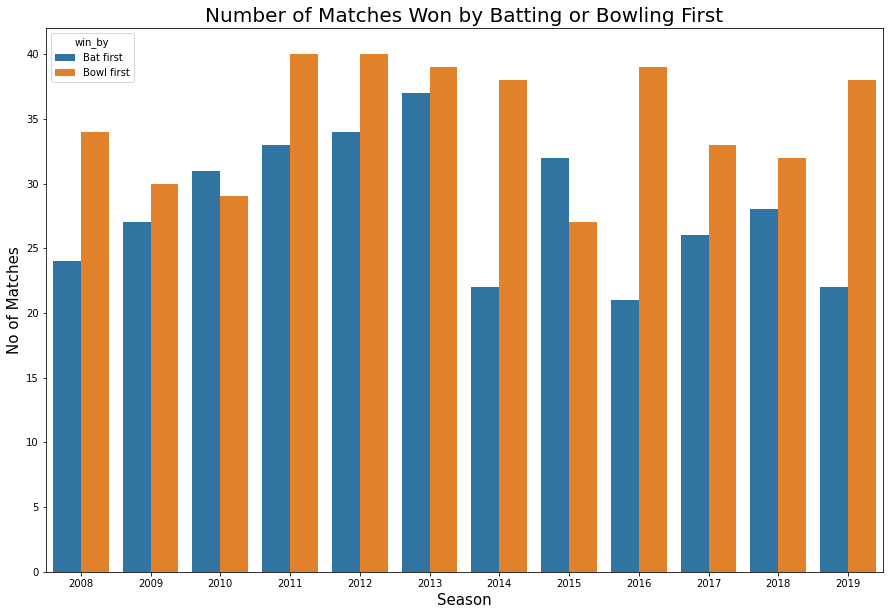

In [71]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'season',hue = 'win_by',data = matches_df)
plt.title("Number of Matches Won by Batting or Bowling First",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("No of Matches",fontsize=15)
plt.show()

## Number of Matches Won by Toss Result!

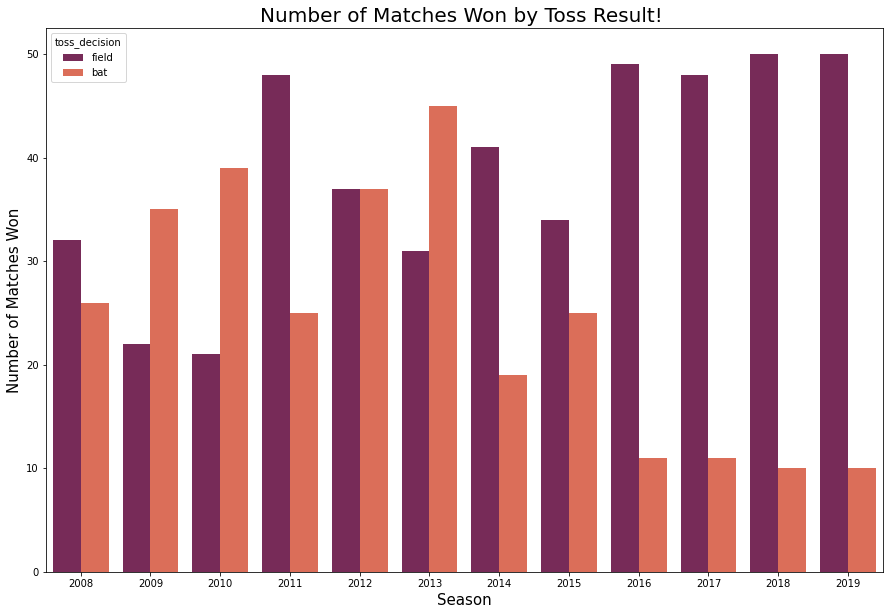

In [74]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'season', hue = 'toss_decision' , data = matches_df , palette='rocket')
plt.title("Number of Matches Won by Toss Result! ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Number of Matches Won",fontsize=15)
plt.show()

In [77]:
final_matches = matches_df.drop_duplicates(subset=['season'], keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


### Players with Most Man of the Match Award  

<Figure size 1296x720 with 0 Axes>

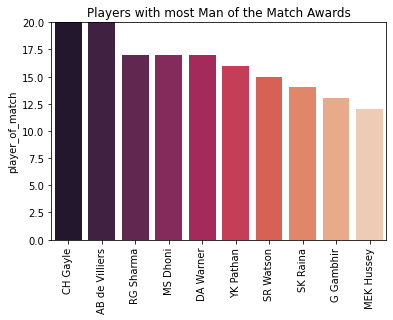

In [86]:
plt.figure(figsize = (18,10))
top_players = matches_df.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Players with most Man of the Match Awards")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v',palette = 'rocket');
plt.show()

#### AB de Villiers and Chris Gayle have won the most number of Man of the Match awards.

### Most Successful IPL Teams 

In [91]:
team_wins_ser = matches_df['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

In [92]:
team_wins_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


Text(0, 0.5, 'Team Names')

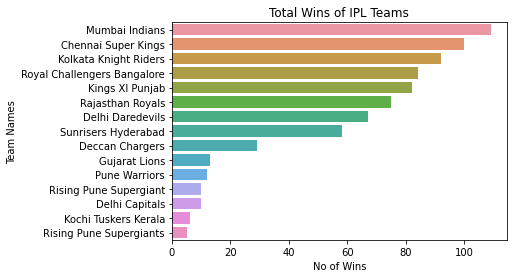

In [96]:
plt.title("Total Wins of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df);
plt.xlabel('No of Wins')
plt.ylabel('Team Names')

### Mumbai Indians have won the most number of IPL Matches! 

## Man of the Match Winners in the Final Matches

In [101]:
final_matches[['season','winner','player_of_match']].reset_index(drop=True).sort_values('season')

,season,winner,player_of_match
1,2008,Rajasthan Royals,YK Pathan
2,2009,Deccan Chargers,A Kumble
3,2010,Chennai Super Kings,SK Raina
4,2011,Chennai Super Kings,M Vijay
5,2012,Kolkata Knight Riders,MS Bisla
6,2013,Mumbai Indians,KA Pollard
7,2014,Kolkata Knight Riders,MK Pandey
8,2015,Mumbai Indians,RG Sharma
9,2016,Sunrisers Hyderabad,BCJ Cutting
0,2017,Mumbai Indians,KH Pandya


## Analysis of Delivery Dataset  

In [110]:
deliveries_df = pd.read_csv('deliveries.csv')

In [111]:
deliveries_df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


### Number of Rows and Columns from Delivery Dataset

In [112]:
print('Number of Rows and Columns from Delivery Dataset-', deliveries_df.shape)

Number of Rows and Columns from Delivery Dataset- (179078, 21)


### Number of Sixes hit by the teams!  

In [120]:
six_data=deliveries_df[deliveries_df['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('Runs Scored','sum'),('Total Sixes','count')])

,Runs Scored,Total Sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


### Numbers of Sixes Hit by Players 

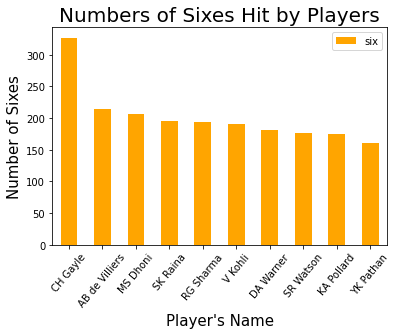

In [126]:
batsman_six = six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax = batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='orange')
plt.title("Numbers of Sixes Hit by Players",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player's Name",fontsize=15)
plt.ylabel("Number of Sixes",fontsize=15)
plt.show()

### Leading Run Scorer's in IPL 

In [128]:
batsman_score=deliveries_df.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
batsman_score.iloc[:10,:]

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


### Most Number of Matches Played by Player

In [132]:
No_Matches_player= deliveries_df[["match_id","player_dismissed"]]
No_Matches_player =No_Matches_player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["batsman","No_of Matches"]
No_Matches_player.head() 

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


Suresh Raina played the most number of matches in IPL.

### Most Wicket Taking Bowler 

In [135]:
wicket_data=deliveries_df.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


Lasith Malinga took the most number of wickets in IPL.